<a href="https://colab.research.google.com/github/HenrryCordovillo/Redes_Neuronales_con_Python/blob/main/Red_Neuronal_Convolucional(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
data = pd.read_csv('pima-indians-diabetes.csv')
data

,enbarazos,plas,presion,piel,prueba,masa,pedigri,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [78]:
X=data.drop('diabetes',axis=1)
y=data['diabetes']

In [79]:
print(X)
print(y)

     enbarazos  plas  presion  piel  prueba  masa  pedigri  edad
0            6   148       72    35       0  33.6    0.627    50
1            1    85       66    29       0  26.6    0.351    31
2            8   183       64     0       0  23.3    0.672    32
3            1    89       66    23      94  28.1    0.167    21
4            0   137       40    35     168  43.1    2.288    33
..         ...   ...      ...   ...     ...   ...      ...   ...
763         10   101       76    48     180  32.9    0.171    63
764          2   122       70    27       0  36.8    0.340    27
765          5   121       72    23     112  26.2    0.245    30
766          1   126       60     0       0  30.1    0.349    47
767          1    93       70    31       0  30.4    0.315    23

[768 rows x 8 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64


In [80]:
data.columns.values

array(['enbarazos', 'plas', 'presion', 'piel', 'prueba', 'masa',
       'pedigri', 'edad', 'diabetes'], dtype=object)

In [81]:
data.isnull().sum()

enbarazos    0
plas         0
presion      0
piel         0
prueba       0
masa         0
pedigri      0
edad         0
diabetes     0
dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   enbarazos  768 non-null    int64  
 1   plas       768 non-null    int64  
 2   presion    768 non-null    int64  
 3   piel       768 non-null    int64  
 4   prueba     768 non-null    int64  
 5   masa       768 non-null    float64
 6   pedigri    768 non-null    float64
 7   edad       768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
enbarazos,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
presion,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
piel,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
prueba,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
masa,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigri,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
edad,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


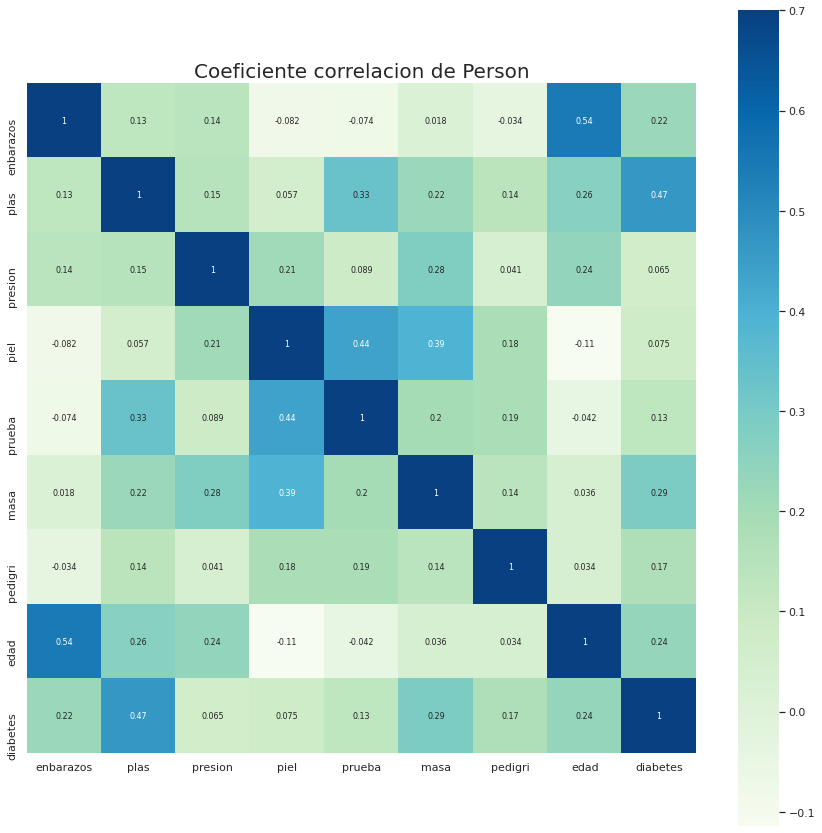

In [84]:
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Coeficiente correlacion de Person', fontsize = 20)
sns.heatmap(data.corr(),vmax=0.7,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={"size":8})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


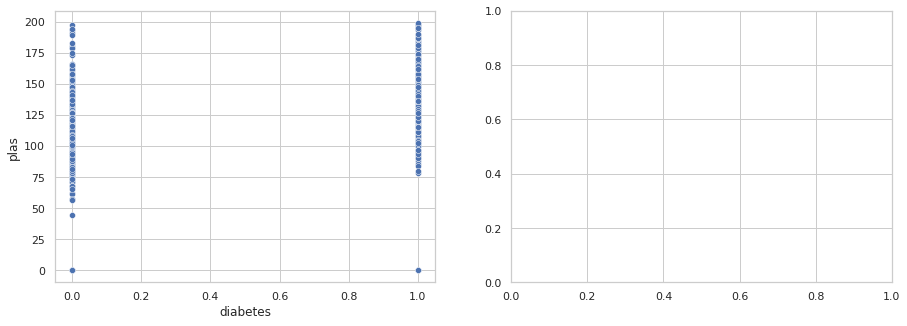

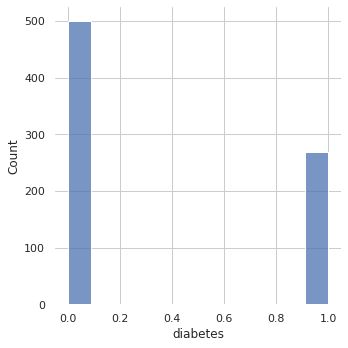

In [85]:
f,axes= plt.subplots(1,2,figsize=(15,5))
sns.displot(data['diabetes'],ax=axes[1])
sns.scatterplot(x='diabetes',y='plas',data= data,ax=axes[0])
sns.despine(bottom=True,left=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


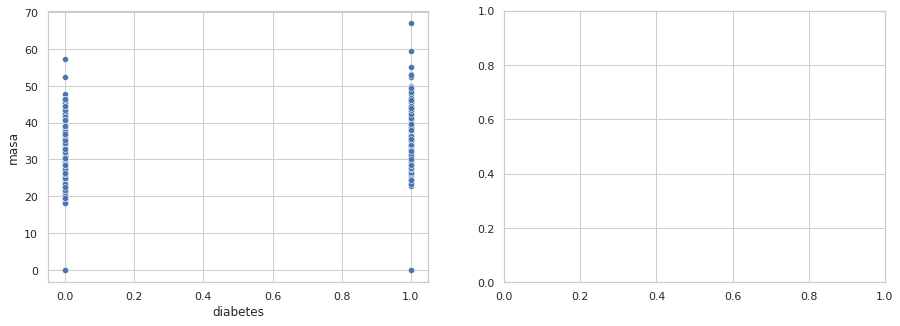

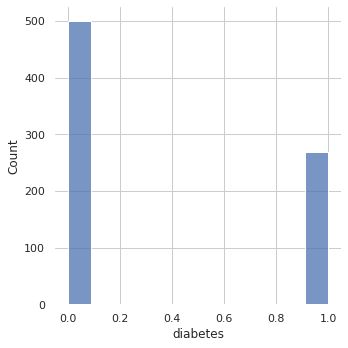

In [86]:
f,axes= plt.subplots(1,2,figsize=(15,5))
sns.displot(data['diabetes'],ax=axes[1])
sns.scatterplot(x='diabetes',y='masa',data= data,ax=axes[0])
sns.despine(bottom=True,left=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


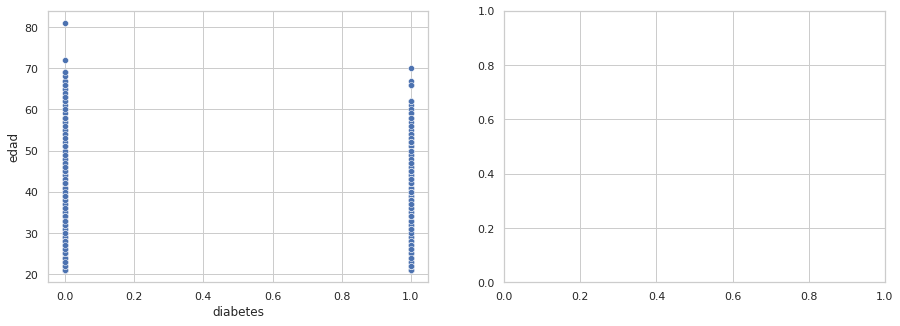

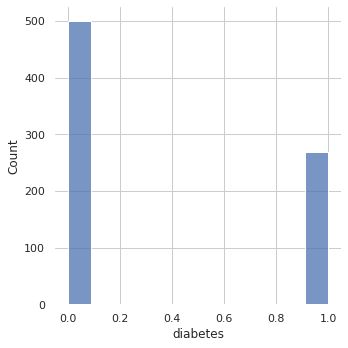

In [87]:
f,axes= plt.subplots(1,2,figsize=(15,5))
sns.displot(data['diabetes'],ax=axes[1])
sns.scatterplot(x='diabetes',y='edad',data= data,ax=axes[0])
sns.despine(bottom=True,left=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe384eee668>,
      dtype=object)

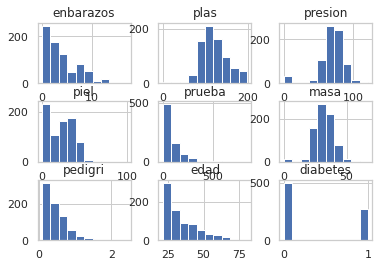

In [88]:
data.hist()

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [90]:
X_train

,enbarazos,plas,presion,piel,prueba,masa,pedigri,edad
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [91]:
X_test

,enbarazos,plas,presion,piel,prueba,masa,pedigri,edad
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
619,0,119,0,0,0,32.4,0.141,24
198,4,109,64,44,99,34.8,0.905,26
538,0,127,80,37,210,36.3,0.804,23
329,6,105,70,32,68,30.8,0.122,37


In [92]:
y_train

334    0
139    0
485    1
547    0
18     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: diabetes, Length: 537, dtype: int64

In [93]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
619    1
198    1
538    0
329    0
302    0
Name: diabetes, Length: 231, dtype: int64

In [103]:
cvscores=[]

In [131]:
model = Sequential() 
model.add(Dense(5, input_dim=8, kernel_initializer= "uniform" , activation= "relu" )) 
model.add(Dense(3, kernel_initializer= "uniform" , activation= "relu" )) 
model.add(Dense(1, kernel_initializer= "uniform" , activation= "sigmoid" )) 
     # Compile model 
model.compile(loss= "binary_crossentropy" , optimizer= "adam" , metrics=["accuracy"]) 
     # Fit the model 
model.fit(X_train, y_train, epochs=1000, batch_size=50, verbose=0) 
     # evaluate the model 
     
scores = model.evaluate(X_train, y_train, verbose=0) 

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
cvscores.append(scores[1] * 100)

accuracy: 76.35%


In [132]:
scores = model.evaluate(X_test, y_test, verbose=0) 

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
cvscores.append(scores[1] * 100)

accuracy: 74.03%
